
Dataset Preview:
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


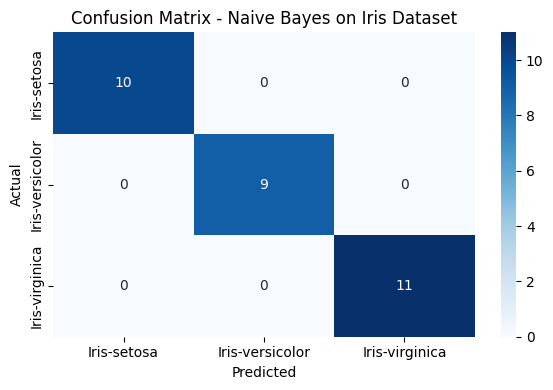


Metrics for class 'Iris-setosa':
TP: 10, FP: 0, FN: 0, TN: 20
Accuracy: 1.00, Error Rate: 0.00, Precision: 1.00, Recall: 1.00

Metrics for class 'Iris-versicolor':
TP: 9, FP: 0, FN: 0, TN: 21
Accuracy: 1.00, Error Rate: 0.00, Precision: 1.00, Recall: 1.00

Metrics for class 'Iris-virginica':
TP: 11, FP: 0, FN: 0, TN: 19
Accuracy: 1.00, Error Rate: 0.00, Precision: 1.00, Recall: 1.00

Overall Accuracy: 1.00
Overall Precision: 1.00
Overall Recall: 1.00


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset (no header)
file_path = 'C:/Users/HP/Downloads/iris/iris.data'
data = pd.read_csv(file_path, header=None)

# Step 2: Assign proper column names
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
print("\nDataset Preview:\n", data.head())

# Step 3: Prepare the data
X = data.drop('species', axis=1)
y = data['species']

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print("\nConfusion Matrix:\n", cm)

# Visualization: Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes on Iris Dataset')
plt.tight_layout()
plt.show()

# Per-class metrics
for idx, label in enumerate(model.classes_):
    TP = cm[idx, idx]
    FP = cm[:, idx].sum() - TP
    FN = cm[idx, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    print(f"\nMetrics for class '{label}':")
    print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
    Accuracy = (TP + TN) / cm.sum()
    Error_rate = 1 - Accuracy
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    print(f"Accuracy: {Accuracy:.2f}, Error Rate: {Error_rate:.2f}, Precision: {Precision:.2f}, Recall: {Recall:.2f}")

# Overall metrics
overall_accuracy = accuracy_score(y_test, y_pred)
overall_precision = precision_score(y_test, y_pred, average='macro')
overall_recall = recall_score(y_test, y_pred, average='macro')
print(f"\nOverall Accuracy: {overall_accuracy:.2f}")
print(f"Overall Precision: {overall_precision:.2f}")
print(f"Overall Recall: {overall_recall:.2f}")
